In [1]:
import sqlite3
import pandas as pd
import numpy as np
import time
from utils import *
from ReactNode import ReactNode
from ChemNode import ChemNode
from ChemNode import ChemNode
from MCTS import MCTS
from tree_utils import *

conn = sqlite3.connect('buyable.db')
buyable = conn.cursor()
retrobiocat = pd.read_pickle("data/final_test_retrobiocat.pkl")
analyzer = Retrosim()

smile = "C[C@@H](N)[C@H](O)c1ccccc1"
root = ChemNode(smile, 0, None, buyable, retrobiocat, analyzer, None)

mcts = MCTS(root)

start = time.time()
mcts.MCTS(1000)
print("Time taken (s): ", time.time()-start)

for react in root.reactions:
    print(f'Reaction name: {react.reaction_name}, Score: {react.get_mcts_value()}')
    for precursor in react.precursors:
        print(f'Chem {precursor.smiles}, Score: {precursor.score}, visits: {precursor.visits}, solution: {precursor.solution}')
    print(" ")
    
prune_tree(root)
paths = generate_paths(root)

/home/rjsilves/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/rjsilves/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
100%|██████████| 1000/1000 [01:21<00:00, 12.33it/s]


Time taken (s):  81.08462238311768
Reaction name: Ketone reduction, Score: 1.0543966155957896
Chem C[C@@H](N)C(=O)c1ccccc1, Score: 1.9, visits: 11, solution: True
 
Reaction name: Ketone amination, Score: 1.1208020577623934
Chem CC(=O)[C@H](O)c1ccccc1, Score: 4.75, visits: 14, solution: True
 
Reaction name: Imine reduction, Score: 1.0338489451859145
Chem CC(=N)[C@H](O)c1ccccc1, Score: 0.0, visits: 8, solution: False
 
Reaction name: Amide hydrolysis (NH), Score: 1.0097026079608635
Chem CC(=O)N[C@H](C)[C@H](O)c1ccccc1, Score: 0.85, visits: 10, solution: False
 
Reaction name: Phosphate hydrolysis, Score: 1.0778841289400352
Chem C[C@@H](N)[C@H](OP(=O)(O)O)c1ccccc1, Score: 2.8049999999999997, visits: 12, solution: False
 
Reaction name: Imine reduction, Score: 1.070249910929137
Chem CC(=N)[C@H](O)c1ccccc1, Score: 0.85975, visits: 9, solution: False
 
Reaction name: Ester hydrolysis (OH), Score: 1.0338489451859145
Chem CCC(=O)O[C@H](c1ccccc1)[C@@H](C)N, Score: 0.0, visits: 8, solution: Fa

In [2]:
root.solution

False

There are 4 paths found.


Enter a number (1-4) to explore a path or type 'exit' to quit:  1



This is path 1 of 4
--------------------
Target Compound: C[C@@H](N)[C@H](O)c1ccccc1


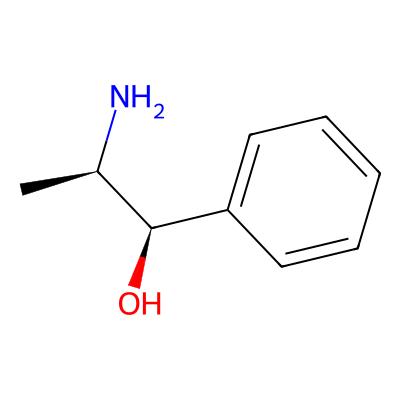


These are the buyable compounds needed for this pathway:
Buyable Compound 1: CC(=O)C(=O)c1ccccc1


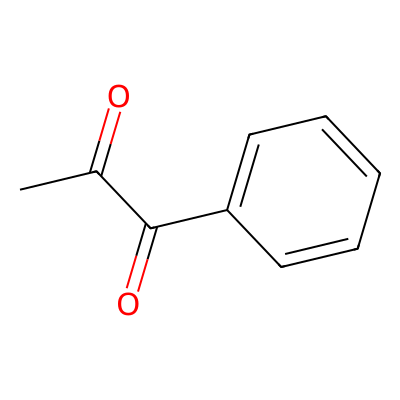


Reaction 1: Ketone amination
Reaction SMILES: CC(=O)C(=O)c1ccccc1>>C[C@@H](N)C(=O)c1ccccc1


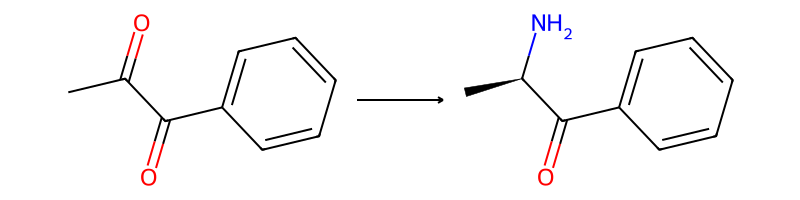


Reaction 2: Ketone reduction
Reaction SMILES: C[C@@H](N)C(=O)c1ccccc1>>C[C@@H](N)[C@H](O)c1ccccc1


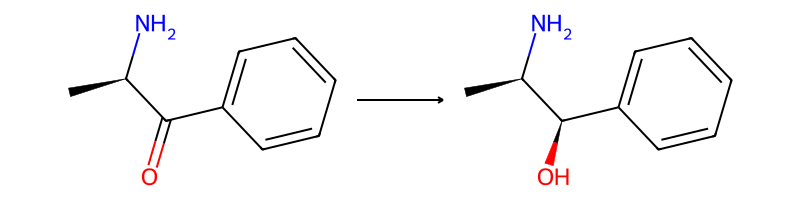

-------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
print("There are " + str(len(paths)) + " paths found.")
while True:
    user_input = input(f"Enter a number (1-{len(paths)}) to explore a path or type 'exit' to quit: ")

    if user_input.lower() == "exit":
        print("Program has been terminated.")
        break

    try:
        num = int(user_input)
        if 1 <= num <= len(paths):
            path_explorer2(paths[num - 1], num, len(paths))
        else:
            print(f"Invalid input. Please enter a number between 1 and {len(paths)}.")
    except ValueError:
        print("Invalid input. Please enter a valid integer or type 'exit' to quit.")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------")